## IMDB binary classification example

IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

Each review is a list of word indices (encoding a sequence of words) corresponding to a indexed list of words.   
The train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:


In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # num_words informs the function that we want only the 10000 most common words
len(train_labels)

25000

In [2]:
list(test_labels)

[0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,


In [3]:
# Decode a IMDB review back to text (from categorical )
word_index = imdb.get_word_index()
print(len(word_index))
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print('100 first',[reverse_word_index[i] for i in range(1,101)])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

88584
100 first ['the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'it', 'i', 'this', 'that', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', 'on', 'not', 'you', 'are', 'his', 'have', 'he', 'be', 'one', 'all', 'at', 'by', 'an', 'they', 'who', 'so', 'from', 'like', 'her', 'or', 'just', 'about', "it's", 'out', 'has', 'if', 'some', 'there', 'what', 'good', 'more', 'when', 'very', 'up', 'no', 'time', 'she', 'even', 'my', 'would', 'which', 'only', 'story', 'really', 'see', 'their', 'had', 'can', 'were', 'me', 'well', 'than', 'we', 'much', 'been', 'bad', 'get', 'will', 'do', 'also', 'into', 'people', 'other', 'first', 'great', 'because', 'how', 'him', 'most', "don't", 'made', 'its', 'then', 'way', 'make', 'them', 'too', 'could', 'any', 'movies', 'after']


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [4]:
# First review as interger sequence (just show 10 words)
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [5]:
# Encoding the interger sequence into a binary matrix
import numpy as np
#Creates an all-zero matrix of shape (len(sequences),dimension)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. #Sets specific indices  of results[i] to 1s
    return results
x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data)

#x_train[:10][:10] # The review is no one-hot encoded with (categorical data: each word index has its own place in the 10000 elements long list. If a word is present in the review the coresponding place gets a 1 otherwise remains 0)

In [6]:
# vectorize the labels as well (easy since labels are already a binary list)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# now data is ready to be fed to the model: x_train, x_test, y_train and y_test

### Choosing components of the network
1. Input data are vectors
2. Labels are scalars
3. A simple stack of fully connected (Dense) layers performs well on such data

In [7]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # 16 hidden neurons in the layer
model.add(layers.Dense(16, activation='relu')) # relu activation function changes negative numbers to 0
model.add(layers.Dense(1, activation='sigmoid')) # one outpput neuron (since this is binary classification). Sigmoid squashes the output into value of 1 or 0.


In [8]:
# Building the model with
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])


In [9]:
# Devide the training data to set aside som data for validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [12]:
# Now train the model. This kills the kernel (takes to many resources with 20 epochs)

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
#history

# SOLUTION put the code in .py file

Epoch 1/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5889 - accuracy: 0.7037 - val_loss: 0.3903 - val_accuracy: 0.8671
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3229 - accuracy: 0.8955 - val_loss: 0.3088 - val_accuracy: 0.8857
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2275 - accuracy: 0.9323 - val_loss: 0.3437 - val_accuracy: 0.8526
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1821 - accuracy: 0.9418 - val_loss: 0.2746 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1402 - accuracy: 0.9602 - val_loss: 0.2801 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1149 - accuracy: 0.9675 - val_loss: 0.2938 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0967 - accuracy: 0.9732 - val_loss: 0.3078 - val_accuracy: 0.8844
Epoch 8/20
30

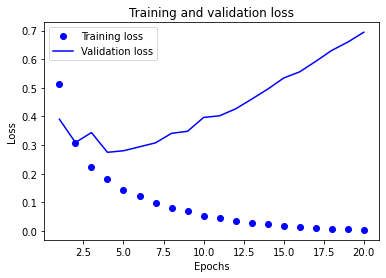

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 20 + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


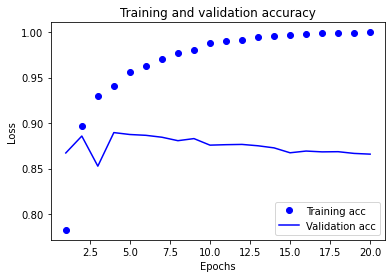

In [22]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
